# Transfer Learning: Fine Tuning

In [1]:
!nvidia-smi

Thu Apr 25 15:57:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Creating Helper Functions

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-04-25 16:00:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-25 16:00:15 (98.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Importing helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
# Downloading the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-04-25 16:05:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   172MB/s    in 0.9s    

2024-04-25 16:05:12 (172 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [9]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [10]:
import tensorflow as tf

IMG_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = 32
                                                                            )

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode  = "categorical",
                                                                batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [14]:
class_names = train_data_10_percent.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [15]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.00000000e+00 6.00000000e+00 5.00000000e+00]
   [2.00000000e+00 6.00000000e+00 5.00000000e+00]
   [1.00000000e+00 5.00000000e+00 4.00000000e+00]
   ...
   [3.37857361e+01 3.07857361e+01 2.17857361e+01]
   [3.39285583e+01 3.09285583e+01 2.19285583e+01]
   [3.16428223e+01 2.86428223e+01 1.96428223e+01]]

  [[2.00000000e+00 6.00000000e+00 5.00000000e+00]
   [1.07142830e+00 5.07142830e+00 4.07142830e+00]
   [1.00000000e+00 5.00000000e+00 4.00000000e+00]
   ...
   [3.37857361e+01 3.07857361e+01 2.17857361e+01]
   [3.39285583e+01 3.09285583e+01 2.19285583e+01]
   [3.16428223e+01 2.86428223e+01 1.96428223e+01]]

  [[1.21428585e+00 5.21428585e+00 4.21428585e+00]
   [1.01530612e+00 5.01530600e+00 4.01530600e+00]
   [1.78571415e+00 5.78571415e+00 4.78571415e+00]
   ...
   [3.37857361e+01 3.07857361e+01 2.17857361e+01]
   [3.39285583e+01 3.09285583e+01 2.19285583e+01]
   [3.16428223e+01 2.86428223e+01 1.96428223e+01]]

  ...

  [[1.43285721e+02 1.53285721e+02 1.54285721e+02]
   [1

# Keras Sequential vs Keras Functional API to create models
* similarities - compiling, fitting , evaluating
* differences - more flexible and able to produce more sophisticated models

# Creating first model with Functional API

In [16]:
# 1. Creating base model with tf.keras.applications

base_model = tf.keras.applications.EfficientNetB0(
    include_top = False, # we want to include our own dense layer
)

# 2. Freeze the base model ( so the underlying pre-trained patterns aren't updated during training )
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

# 4. If using ResnetV2, need to normalize input
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing input through base model: {x.shape}")

# 6. Average pool the outputs of base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after global average pooling2d: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

# 8. Combine input with the output
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compiling the model
model_0.compile(loss = "CategoricalCrossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 10. Fit the model and save its history
history_0 = model_0.fit(
    train_data_10_percent,
    epochs = 5,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data))
)

16705208/16705208 [==============================] - 0s 0us/step
Shape after passing input through base model: (None, 7, 7, 1280)
Shape after global average pooling2d: (None, 1280)
Epoch 1/5
24/24 [==============================] - 17s 270ms/step - loss: 1.8518 - accuracy: 0.4147 - val_loss: 1.2968 - val_accuracy: 0.7253
Epoch 2/5
24/24 [==============================] - 4s 171ms/step - loss: 1.0768 - accuracy: 0.7760 - val_loss: 0.8900 - val_accuracy: 0.8026
Epoch 3/5
24/24 [==============================] - 4s 133ms/step - loss: 0.7778 - accuracy: 0.8320 - val_loss: 0.7255 - val_accuracy: 0.8273
Epoch 4/5
24/24 [==============================] - 4s 134ms/step - loss: 0.6283 - accuracy: 0.8707 - val_loss: 0.6429 - val_accuracy: 0.8322
Epoch 5/5
24/24 [==============================] - 5s 170ms/step - loss: 0.5383 - accuracy: 0.8867 - val_loss: 0.6048 - val_accuracy: 0.8372


In [17]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.5556 - accuracy: 0.8620


[0.5555988550186157, 0.8619999885559082]

In [19]:
# check the layers in our base models
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [20]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________

In [21]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

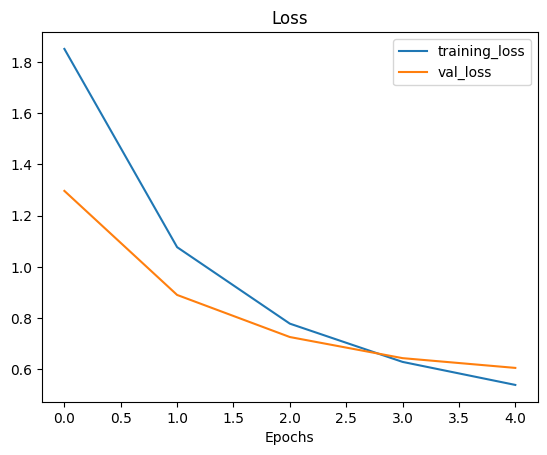

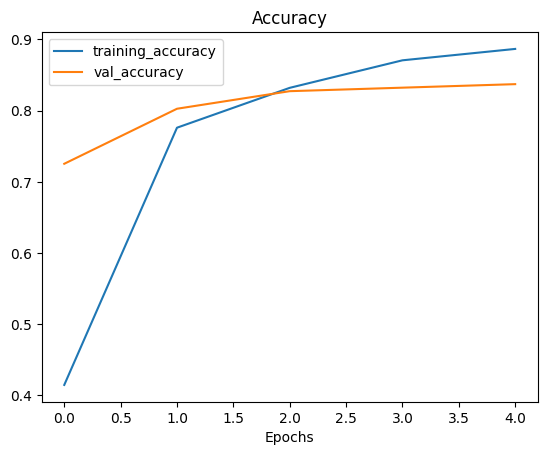

In [22]:
plot_loss_curves(history_0)

# Getting Feature Vector from a trained model

In [25]:
input_shape = (1, 4, 4, 3)

# create a random_tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor}")

Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]


In [27]:
# pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"Global average pooled random tensor: {global_average_pooled_tensor}\n")

Global average pooled random tensor: [[-0.09368646 -0.45840448 -0.2885598 ]]



In [28]:
print(f"Shape of input Tensor: {input_tensor.shape}\n")
print(f"Shape of global average pooled tensor: {global_average_pooled_tensor.shape}")

Shape of input Tensor: (1, 4, 4, 3)

Shape of global average pooled tensor: (1, 3)


In [29]:
# replicating the global average pool layer
tf.reduce_mean(input_tensor, axis = [1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

# Transfer Learning Experiments

* model_1 : Feature extraction transfer learning with 1% of the training data with data augmentation
* model_2 : Use feature extraction transfer learning with 10% of data
* model_3 : Use fine tuning transfer learning on 10% of training data with data augmentation
* model_4: Use fine-tuning transfer learning on 100% of the training data with data augmentation